<a href="https://colab.research.google.com/github/awg5357/docs/blob/master/Abhi_Tensorflow4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from zipfile import ZipFile
file_name = '/content/drive/My Drive/Pattee Team/data.zip'

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [81]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize
print(os.listdir("/content/data"))

['train', 'validation']


In [82]:
print(os.listdir("/content/data/train"))

['flowchart', 'nonflowchart']


In [86]:
TRAIN_DIR = "/content/data/train"
TEST_DIR =  "/content/data/validation"
print (os.listdir(TRAIN_DIR))
print (os.listdir(TEST_DIR))

['flowchart', 'nonflowchart']
['flowchart', 'nonflowchart']


In [0]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
          if nextdir in ['flowchart']:
            label = 0
          elif nextdir in ['nonflowchart']:
            label = 1
    return nextdir, label

## PREPROCESSING

In [0]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

In [0]:
# X_train, y_train = preprocessing_data(TRAIN_DIR)

In [0]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
      if nextDir in ['flowchart']:
        label = 0
      else:
        label = 1
                
        temp = Dir + nextDir
                
        for file in tqdm(os.listdir(temp)):
          img = cv2.imread(temp + '/' + file)
          if img is not None:
            img = skimage.transform.resize(img, (150, 150, 3))
            #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3)
            img = np.asarray(img)
            X.append(img)
            y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [93]:
X_train, y_train = get_data('/content/data/train')

FileNotFoundError: ignored

In [26]:
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 2/2 [00:00<00:00, 10381.94it/s]


In [38]:
print(X_train.shape,'\n',X_test.shape)

(400, 150, 150, 3) 
 (0,)


In [39]:
print(y_train.shape,'\n',y_test.shape)

(400,) 
 (0,)


In [40]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.


In [0]:
#The arrays are not normalized because they have already been provided in the necessary format.

In [42]:
print(y_train.shape,'\n',y_test.shape)

(400, 2) 
 (0, 2)


In [94]:
Pimages = os.listdir(TRAIN_DIR + "flowchart")
Nimages = os.listdir(TRAIN_DIR + "nonflowchart")

FileNotFoundError: ignored

In [43]:
import matplotlib.pyplot as plt
def plotter(i):
    imagep1 = cv2.imread(TRAIN_DIR+"Flowchart/"+Pimages[i])
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3) , mode = 'reflect')
    imagen1 = cv2.imread(TRAIN_DIR+"Non-Flowchart/"+Nimages[i])
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3))
    pair = np.concatenate((imagen1, imagep1), axis=1)
    print("(Left) - No Flowchart Vs (Right) - Flowchart")
    print("-----------------------------------------------------------------------------------------------------------------------------------")
    plt.figure(figsize=(10,5))
    plt.imshow(pair)
    plt.show()
for i in range(0,5):
    plotter(i)

NameError: ignored

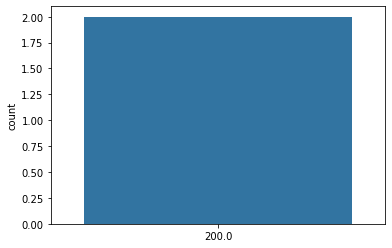

In [44]:
import seaborn as sns
count = y_train.sum(axis = 0)
sns.countplot(x = count)

In [0]:
#The classes are imbalanced therefore validation accuracy won't be a good metric to analyze the model performance ,
#We will also have to take precision , recall and confusion matrix into account.

In [46]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:1335: UserWarning: `epsilon` argument is deprecated and will be removed, use `min_delta` instead.
  warnings.warn('`epsilon` argument is deprecated and '


In [0]:
#Callbacks to reduce learning rate timely after monitoring a quantity.

In [0]:
#filepath="weights.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
from keras.models import Sequential
from keras.layers import Dense , Activation
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD , RMSprop
from keras.layers import Conv2D , BatchNormalization
from keras.layers import MaxPooling2D
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [49]:
X_train=X_train.reshape(5216,3,150,150)
X_test=X_test.reshape(624,3,150,150)

ValueError: ignored

In [0]:
#Tried different model architectures , the best I could achieve was 83.75 % validation accuracy without any pre-trained CNN models. The architecture is different from the best and could give 83.01 % .
# But again our main criteria is not accuracy but the precision and recall

In [0]:
#Other Hyperparameters like learning rates, epochs, batch size , no. of filters , 
#activation function have been tuned repeatedly to achieve better results

In [102]:
def swish_activation(x):
    return (K.sigmoid(x) * x)

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(3,150,150)))
model.add(Conv2D(16, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(3,150,150)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(96, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(96, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), dilation_rate=(2, 2), activation='relu', padding="same"))
model.add(Conv2D(128, (3, 3), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation=swish_activation))
model.add(Dropout(0.4))
model.add(Dense(2 , activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer=RMSprop(lr=0.00005),
                  metrics=['accuracy'])

print(model.summary())

ValueError: ignored

In [0]:
batch_size = 100
epochs = 10

In [100]:
history = model.fit(X_train, y_train, validation_data = (X_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)

NameError: ignored

In [99]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [0]:
#Now for the metrics

In [97]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

NameError: ignored

In [98]:
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

NameError: ignored